Import libraries

In [445]:
import pandas as pd
pd.options.mode.chained_assignment = None 

import os

Read csv file

In [446]:
raw_sales_df_jan = pd.read_csv('./Data/Sales_January_2019.csv')
raw_sales_df_jan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


Merge all the 12 files and export as a single file

In [447]:
# read location of files
files = [ file for file in os.listdir('./Data') ]

# create empty dataframe
merged_sales_df = pd.DataFrame()

# merging 12 months of data into a single file
for file in files:
    df = pd.read_csv('./Data/' + file)
    merged_sales_df = pd.concat([merged_sales_df, df])

# export merged data into csv file
merged_sales_df.to_csv('total_sales_data_2019.csv', index=False)

Start working on merged csv file which has exported

In [448]:
# read updated sales csv file
raw_sales_df = pd.read_csv('total_sales_data_2019.csv')
raw_sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [449]:
# get shape of the data
raw_sales_data.shape

(186850, 6)

In [450]:
# get size of the data
raw_sales_data.size

1121100

Start cleaning data

In [453]:
# find NaN values
raw_sales_data[raw_sales_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [454]:
# drop rows which have NaN value
sales_df_without_nan = raw_sales_data.dropna()
sales_df_without_nan

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [455]:
# get sum of duplicate data
sales_df_without_nan.duplicated().sum()

618

In [456]:
# remove duplicates
sales_df = sales_df_without_nan.drop_duplicates()
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [457]:
# check shape after cleaning data
sales_df.shape

(185687, 6)

In [465]:
# Remove remaining garbage data
sales_df = sales_df[sales_df['Order Date'].str[0:2] != 'Or']
sales_df.shape

(185686, 6)

Add new columns & change data type of the columns

In [466]:
# get data type of the columns
sales_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [467]:
# convert Quantity Ordered and Price Each to numeric
sales_df['Quantity Ordered'] = pd.to_numeric(sales_df['Quantity Ordered'], errors='coerce')
sales_df['Price Each'] = pd.to_numeric(sales_df['Price Each'], errors='coerce')
sales_df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [468]:
# add new column named sales ('Quantity Ordered * Price Each)
sales_df['Sales'] = sales_df['Quantity Ordered'] * sales_df['Price Each']
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [469]:
# add new column month
sales_df['Month'] = sales_df['Order Date'].str[0:2]
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04


In [470]:
# check data type of the newly added column
sales_df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Sales               float64
Month                object
dtype: object

In [472]:
# convert data type string to int for Month column
sales_df['Month'] = pd.to_numeric(sales_df['Month'])
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


Task 1: Need to find best month for sales and how much earned on that month?

In [521]:
# group by data
grouped_sales_df = sales_df.groupby('Month').sum(numeric_only=True)
grouped_sales_df

,Quantity Ordered,Price Each,Sales
Month,,,
1,10893,1810924.81,1821413.16
2,13431,2186940.38,2200078.08
3,16979,2789084.64,2804973.35
4,20536,3366218.76,3389217.98
5,18653,3133134.61,3150616.23
6,15234,2560503.50,2576280.15
7,16054,2631225.12,2646461.32
8,13429,2226963.90,2241083.37
9,13091,2081897.65,2094465.69


In [526]:
# month wise sales data
month_wise_sales_df = grouped_sales_df['Sales']
month_wise_sales_df

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Sales, dtype: float64

<Axes: title={'center': 'Sales chart - 2019'}, xlabel='Month', ylabel='Sales (Million $)'>

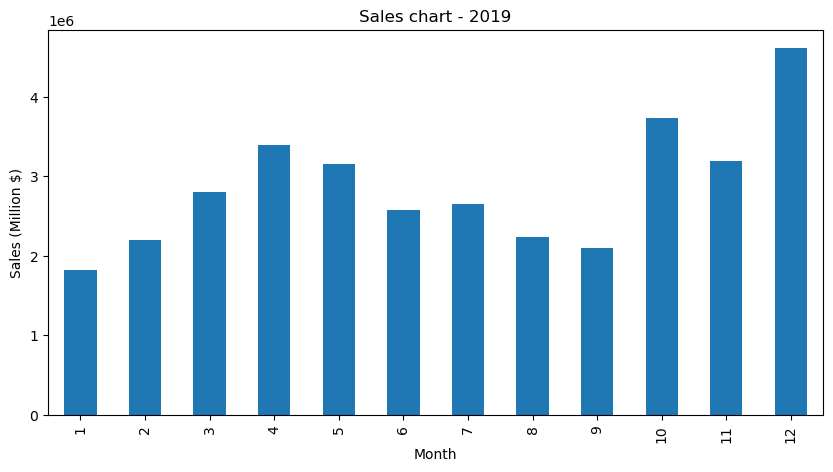

In [527]:
# plot bar chart
month_wise_sales_df.plot(kind='bar', xlabel='Month', ylabel='Sales (Million $)', title='Sales chart - 2019', figsize=(10, 5))

Task 2: What city has the highest number of sales?

In [533]:
# add new column city
def get_city(address):
    return address.split(',')[1].lower()

def get_state(address):
    return address.split(',')[2].split(' ')[1].lower()

sales_df['City'] = sales_df['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,dallas (tx)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,boston (ma)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,los angeles (ca)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,los angeles (ca)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,los angeles (ca)


In [535]:
# grouped data by city
grouped_df_city = sales_df.groupby('City').sum(numeric_only=True)
grouped_df_city

,Quantity Ordered,Price Each,Sales,Month
City,,,,
atlanta (ga),16584,2778608.69,2794199.07,104649
austin (tx),11137,1808340.03,1818044.33,69720
boston (ma),22494,3634398.40,3658627.65,140898
dallas (tx),16707,2750026.38,2765373.96,104447
los angeles (ca),33247,5417171.70,5448304.28,208020
new york city (ny),27903,4632920.54,4661867.14,175557
portland (me),2746,446752.36,449321.38,17119
portland (or),11291,1859836.44,1870010.56,70517
san francisco (ca),50169,8204001.38,8254743.55,314949


In [536]:
# city wise sales
city_wise_sales_df = grouped_df_city['Sales']
city_wise_sales_df

City
 atlanta (ga)          2794199.07
 austin (tx)           1818044.33
 boston (ma)           3658627.65
 dallas (tx)           2765373.96
 los angeles (ca)      5448304.28
 new york city (ny)    4661867.14
 portland (me)          449321.38
 portland (or)         1870010.56
 san francisco (ca)    8254743.55
 seattle (wa)          2745046.02
Name: Sales, dtype: float64

<Axes: title={'center': 'City wise sales - 2019'}, xlabel='city', ylabel='sales in $(Million)'>

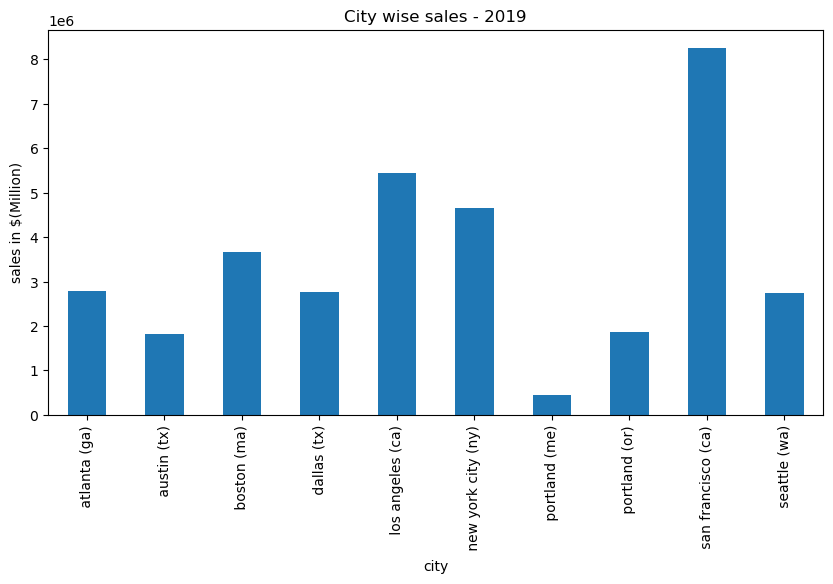

In [537]:
# plot bar chart for city wise sales
city_wise_sales_df.plot(kind='bar', xlabel='city', ylabel='sales in $(Million)', title='City wise sales - 2019', figsize=(10, 5))

Task 3: Which product sold the most?

In [539]:
# list of unique products
sales_df['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [540]:
# number of unique products
sales_df['Product'].nunique()

19

In [542]:
# product grouped with decending order
grouped_product_df = sales_df.groupby('Product').sum(numeric_only=True)
grouped_product_df.sort_values(by='Quantity Ordered', ascending=False)

,Quantity Ordered,Price Each,Sales,Month
Product,,,,
AAA Batteries (4-pack),30986,61629.88,92648.14,146149
AA Batteries (4-pack),27615,78942.72,106041.60,145423
USB-C Charging Cable,23931,261215.05,285975.45,154520
Lightning Charging Cable,23169,323069.50,346376.55,152741
Wired Headphones,20524,225999.51,246082.76,133123
Apple Airpods Headphones,15637,2328750.00,2345550.00,109304
Bose SoundSport Headphones,13430,1329667.02,1342865.70,93918
27in FHD Monitor,7541,1124625.02,1131074.59,52484
iPhone,6847,4788000.00,4792900.00,47933


In [548]:
# get product wise quantity ordered
xx = grouped_product_df[grouped_product_df['Quantity Ordered'] >= 20000]
product_wise_quantity_df = xx['Quantity Ordered']
product_wise_quantity_df

Product
AA Batteries (4-pack)       27615
AAA Batteries (4-pack)      30986
Lightning Charging Cable    23169
USB-C Charging Cable        23931
Wired Headphones            20524
Name: Quantity Ordered, dtype: int64

<Axes: title={'center': 'Product wise quantity ordered - 2019'}, xlabel='product', ylabel='quantity ordered'>

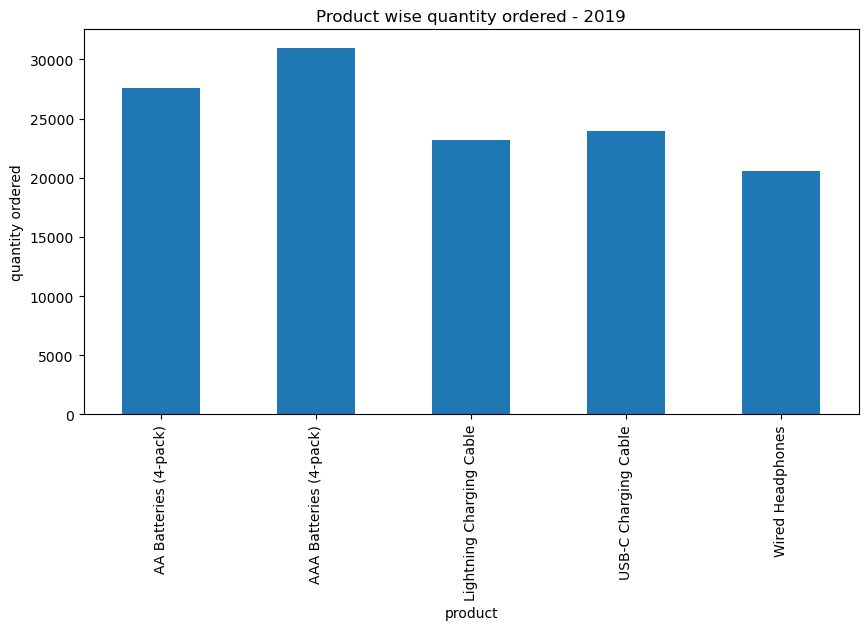

In [549]:
# plot bar chart for product wise quantity ordered
product_wise_quantity_df.plot(kind='bar', xlabel='product', ylabel='quantity ordered', title='Product wise quantity ordered - 2019', figsize=(10,5))